In [31]:
import os
import numpy as np
from matplotlib import pyplot
#Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D  
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
#Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/datasetMul.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

#Imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
#Mostrar una cierta cantidad de datos
for i in range(20):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
      68     180        74
      77     160        70
      25     173        95
      81     165        62
      19     188        55
      67     190       100
      59     165       157
      70     165        61
      45     170        75
      50     175        79
      72     155        68
      80     160        70
      48     175       168
      65     173        68
      81     173       114
      78     160        89
      30     193        87
      46     168        73
      65     168        80
      39     178       117


In [33]:
#definicion de funcion que calcula desviacion estandar
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [34]:
#llama a 'featureNormalize' con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación Estandar calculada:', sigma)
print(X_norm)

[[ 68.  180.3]
 [ 77.  160. ]
 [ 25.  172.7]
 ...
 [ 83.  160. ]
 [ 69.  162.6]
 [ 97.  165.1]]
Media calculada: [ 62.598   169.66406]
Desviación Estandar calculada: [16.60350553 10.78472098]
[[ 0.32535298  0.98620447]
 [ 0.86740719 -0.89608809]
 [-2.26446156  0.28150381]
 ...
 [ 1.22877666 -0.89608809]
 [ 0.38558122 -0.65500628]
 [ 2.07197209 -0.42319685]]


In [35]:
#Añade el termino de interseccion a X
#(Columna de u1's para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.32535298  0.98620447]
 [ 1.          0.86740719 -0.89608809]
 [ 1.         -2.26446156  0.28150381]
 ...
 [ 1.          1.22877666 -0.89608809]
 [ 1.          0.38558122 -0.65500628]
 [ 1.          2.07197209 -0.42319685]]


In [36]:
#definicion de funcion para calcular el costo
def computeCostMulti(X, y, theta):
    #Inicializa algunos valores que seran utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [37]:
#defincionn de funcion para calcular el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores que seran de utilidad
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente es: [80.79915987 -1.53680955  9.22209784]
El precio predecido para un paciente de 28 años, 184.3cm de altura y 70kg de peso corporal (usando el descenso por el gradiente) es: $2162


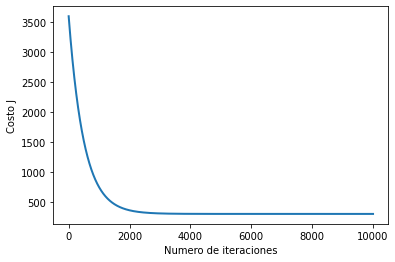

In [38]:
#Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

#inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

#Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente es: {:s}'.format(str(theta)))

#Estimar el precio, para un paciente de 28 años, 184.3cm de altura y 70kg de peso corporal
X_array = [28, 184.6, 65]
#normalizar
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para un paciente de 28 años, 184.3cm de altura y 70kg de peso corporal (usando el descenso por el gradiente) es: ${:.0f}'.format(price))